In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('fordTrain.csv')
df1=pd.read_csv('fordTest.csv')
df=df.drop(['TrialID','ObsNum','P8','V7','V9'],axis=1) 
df1=df1.drop(['TrialID','ObsNum','P8','V7','V9'],axis=1)
y_train=df['IsAlert']  # The labels for the train set
X_train=df.drop(['IsAlert'],axis=1) # The features of the train set

y_test=df1['IsAlert'] # The labels for the test set
X_test=df1.drop(['IsAlert'],axis=1) # The features of the test set

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
import datetime
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

grid_lg = LogisticRegression(C=0.01, class_weight='balanced', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=-1, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
grid_lg.fit(X_train, y_train)
predicts_lg=cross_val_predict(grid_lg, X_train, y_train, cv=5, verbose=2, n_jobs=1, method='predict_proba')
y_test_lg = grid_lg.predict_proba(X_test)
fpr_lg, tpr_lg, thresholds_lg = roc_curve(y_train, predicts_lg[:,1:])
auc_lg = roc_auc_score(y_train.values.ravel(), predicts_lg[:,1:])

/home/wcx/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/wcx/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:1296: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.5min finished


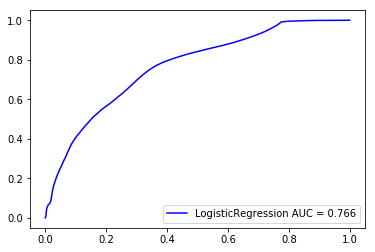

In [3]:
def p_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = roc_curve(y_train, prob[:,1:])
    roc_auc = roc_auc_score(y_train.values.ravel(), prob[:,1:])
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
p_roc_curves(y_test, predicts_lg,'LogisticRegression')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.9min finished


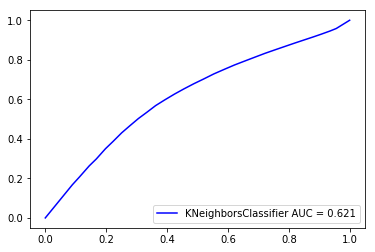

In [4]:
grid_knn = KNeighborsClassifier(n_neighbors = 30)
grid_knn.fit(X_train, y_train)
predicts_knn=cross_val_predict(grid_knn, X_train, y_train, cv=5, verbose=2, n_jobs=1, method='predict_proba')
y_test_knn = grid_knn.predict_proba(X_test)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train, predicts_knn[:,1:])
auc_knn = roc_auc_score(y_train.values.ravel(), predicts_knn[:,1:])
p_roc_curves(y_test, predicts_knn,'KNeighborsClassifier')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.4s finished


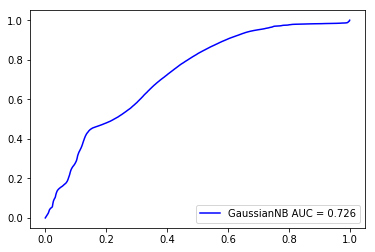

In [5]:
grid_nb = GaussianNB()
grid_nb.fit(X_train, y_train)
predicts_nb=cross_val_predict(grid_nb, X_train, y_train, cv=5, verbose=2, n_jobs=1, method='predict_proba')
y_test_nb = grid_nb.predict_proba(X_test)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_train, predicts_nb[:,1:])
auc_nb = roc_auc_score(y_train.values.ravel(), predicts_nb[:,1:])
p_roc_curves(y_test, predicts_nb,'GaussianNB')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   34.5s finished


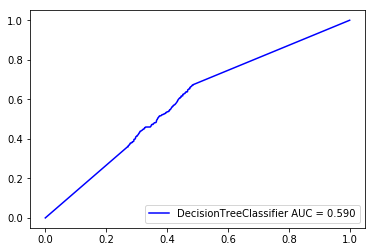

In [6]:
grid_dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=30, min_samples_split=40, min_samples_leaf=20, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
grid_dt.fit(X_train, y_train)
predicts_dt=cross_val_predict(grid_dt, X_train, y_train, cv=5, verbose=2, n_jobs=1, method='predict_proba')
y_test_dt = grid_dt.predict_proba(X_test)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_train, predicts_dt[:,1:])
auc_dt = roc_auc_score(y_train.values.ravel(), predicts_dt[:,1:])
p_roc_curves(y_test, predicts_dt,'DecisionTreeClassifier')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 20.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 107.2min finished


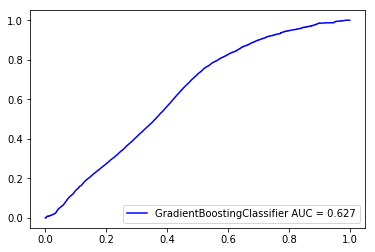

In [7]:
grid_gbc = GradientBoostingClassifier(learning_rate=0.3, n_estimators=400, max_depth=30,min_samples_leaf=1, 
      max_features='sqrt', subsample=1.0, random_state=None)
grid_gbc.fit(X_train, y_train)
predicts_gbc=cross_val_predict(grid_gbc, X_train, y_train, cv=5, verbose=2, n_jobs=1, method='predict_proba')
y_test_gbc = grid_gbc.predict_proba(X_test)
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_train, predicts_gbc[:,1:])
auc_gbc = roc_auc_score(y_train.values.ravel(), predicts_gbc[:,1:])
p_roc_curves(y_test, predicts_gbc,'GradientBoostingClassifier')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 12.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 64.1min finished


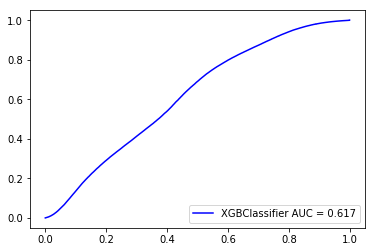

In [9]:
grid_xgb = XGBClassifier(booster='gbtree',
                       gamma= 0.2, 
                       learning_rate= 0.7,
                       max_depth= 30,
                       n_estimators= 400, 
                       objective= 'binary:logistic')
grid_xgb.fit(X_train, y_train)
predicts_xgb=cross_val_predict(grid_xgb, X_train, y_train, cv=5, verbose=2, n_jobs=1, method='predict_proba')
y_test_xgb = grid_xgb.predict_proba(X_test)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_train, predicts_xgb[:,1:])
auc_xgb = roc_auc_score(y_train.values.ravel(), predicts_xgb[:,1:])
p_roc_curves(y_test, predicts_xgb,'XGBClassifier')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.1min finished


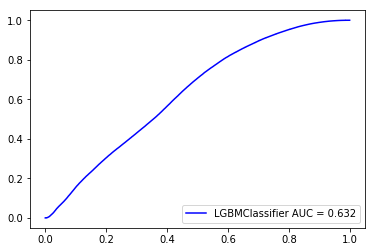

In [10]:
grid_lgbm = LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.9497036, importance_type='split',
        learning_rate=0.3, max_depth=30, min_child_samples=20,
        min_child_weight=39.3259775, min_split_gain=0.0222415,
        n_estimators=400, n_jobs=-1, num_leaves=34, objective=None,
        random_state=None, reg_alpha=0.041545473, reg_lambda=0.0735294,
        silent=True, subsample=0.8715623, subsample_for_bin=200000,
        subsample_freq=0)
grid_lgbm.fit(X_train, y_train)
predicts_lgbm=cross_val_predict(grid_lgbm, X_train, y_train, cv=5, verbose=2, n_jobs=1, method='predict_proba')
y_test_lgbm = grid_lgbm.predict_proba(X_test)
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_train, predicts_lgbm[:,1:])
auc_lgbm = roc_auc_score(y_train.values.ravel(), predicts_lgbm[:,1:])
p_roc_curves(y_test, predicts_lgbm,'LGBMClassifier')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 30.0min finished


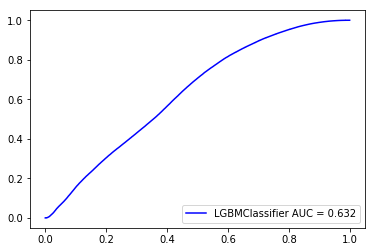

In [11]:
grid_rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=400, max_features=0.2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
grid_rf.fit(X_train, y_train)
predicts_rf=cross_val_predict(grid_rf, X_train, y_train, cv=5, verbose=2, n_jobs=1, method='predict_proba')
y_test_rf = grid_rf.predict_proba(X_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, predicts_rf[:,1:])
auc_rf = roc_auc_score(y_train.values.ravel(), predicts_rf[:,1:])
p_roc_curves(y_test, predicts_lgbm,'LGBMClassifier')

Fitting 8 classifiers...
Fitting classifier1: xgbclassifier (1/8)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.7, max_delta_step=0,
       max_depth=30, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Fitting classifier2: lgbmclassifier (2/8)
LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.9497036, importance_type='split',
        learning_rate=0.3, max_depth=30, min_child_samples=20,
        min_child_weight=39.3259775, min_split_gain=0.0222415,
        n_estimators=400, n_jobs=-1, num_leaves=34, objective=None,
        random_state=None, reg_alpha=0.041545473, reg_lambda=0.0735294,
        silent=True, subsample=0.8715623, subsample_for_bin=200000,
        subsample_freq=0)
Fitting classifier3: rando

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  7.9min finished
/home/wcx/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:1296: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Fitting classifier4: logisticregression (4/8)
LogisticRegression(C=0.01, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=1, warm_start=False)
[LibLinear]Fitting classifier5: gaussiannb (5/8)
GaussianNB(priors=None, var_smoothing=1e-09)
Fitting classifier6: gradientboostingclassifier (6/8)
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=30,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=400,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=1, warm_st

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   21.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   21.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   21.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    4.1s finished


准确性：
Train：1.0000
精确率：
Train：1.0000
召回率：
Train：1.0000
f1_score：
Train：1.0000
roc_auc：
Train：1.0000
KS：
Train：1.0000


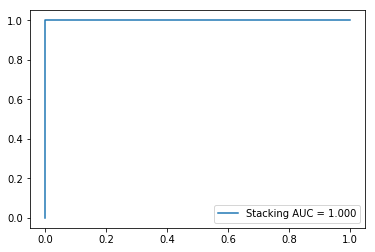

In [12]:
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve

stack2 = StackingClassifier(classifiers=[grid_xgb, grid_lgbm, grid_rf,grid_lg,grid_nb,grid_gbc,grid_dt,grid_knn], 
                             meta_classifier=grid_xgb, use_probas=True, verbose=3)

stack2.fit(X_train, y_train)

def model_metrics(clf, X_train, X_test, y_train, y_test, i=0):
    # 预测
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    y_train_pred_proba = clf.predict_proba(X_train)[:, 1]
    y_test_pred_proba = clf.predict_proba(X_test)[:, 1]
    
    # 评估
    # 准确性
    print('准确性：')
    print('Train：{:.4f}'.format(accuracy_score(y_train, y_train_pred)))
   
    
    # 精准率
    print('精确率：')
    print('Train：{:.4f}'.format(precision_score(y_train, y_train_pred)))

    # 召回率
    print('召回率：')
    print('Train：{:.4f}'.format(recall_score(y_train, y_train_pred)))

    # f1_score
    print('f1_score：')
    print('Train：{:.4f}'.format(f1_score(y_train, y_train_pred)))

    
    # roc_auc
    print('roc_auc：')
    print('Train：{:.4f}'.format(roc_auc_score(y_train, y_train_pred_proba)))   
    
    # 描绘 ROC 曲线
    fpr_tr, tpr_tr, _ = roc_curve(y_train, y_train_pred_proba)

    # KS
    print('KS：')
    print('Train：{:.4f}'.format(max(abs((fpr_tr - tpr_tr)))))
    plt.plot(fpr_tr, tpr_tr, 
             label="Stacking AUC = {:.3f}".format(roc_auc_score(y_train, y_train_pred_proba)))
    plt.legend(loc='best')
model_metrics(stack2, X_train, X_test, y_train, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   22.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    4.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   22.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    4.1s finished


准确性：
Train：1.0000
精确率：
Train：1.0000
召回率：
Train：1.0000
f1_score：
Train：1.0000
roc_auc：
Train：1.0000
KS：
Train：1.0000


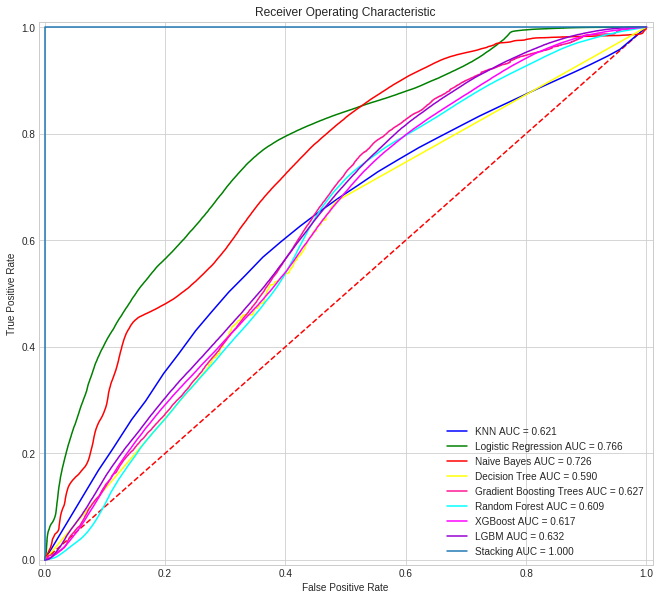

In [13]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(11,10)) 
models = [
    'KNN',
    'Logistic Regression',  
    'Naive Bayes', 
    'Decision Tree', 
    'Gradient Boosting Trees',
    'Random Forest',
    'XGBoost', 
    'LGBM',
]

probs = [
    predicts_knn,
    predicts_lg,
    predicts_nb,
    predicts_dt,
    predicts_gbc,
    predicts_rf,
    predicts_xgb,
    predicts_lgbm,  
]
colors = [
    'blue',
    'green',
    'red',
    'yellow',
    'deeppink',
    'cyan',
    'magenta',
    'darkviolet'
]



plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


def p_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = roc_curve(y_train, prob[:,1:])
    roc_auc = roc_auc_score(y_train.values.ravel(), prob[:,1:])
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.3f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')


for i, model in list(enumerate(models)):
    p_roc_curves(y_test, probs[i], models[i]) 
model_metrics(stack2, X_train, X_test, y_train, y_test)
plt.savefig('Original_AUC.png')    
plt.show()